# CS/ECE/ME/EP 759 (High Performance Computing for Engineering Applications) Course Project: Cautiously Aggressive GPU Space Sharing to Improve Resource Utilization and Job Efficiency


This Jupyter notebook contains the plotting scripts for producing the figures in Rui Pan's CS 759 project report.

In [54]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(0)

def fluctuate(num):
    """Takes in a number n, returns a random number in [n-1, n+1].
    Used to produce the fluctuating effect of NVML utilizations.
    """
    result = random.randint(num-1, num+1)
    if result < 0: 
        result = 0
    return result

## Figure 1: Visual illustration of the benefits of space sharing

### Figure 1.1 (Left): Running two jobs that utilize different types of cores using FIFO

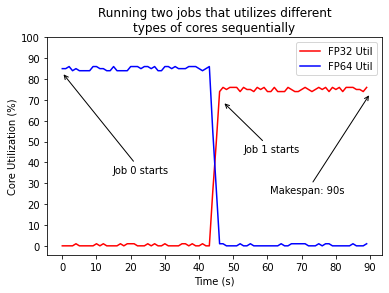

In [55]:
time = list(range(90))

fp32_util = [fluctuate(0) for _ in range(44)] + [fluctuate(25), fluctuate(50)] + [fluctuate(75) for _ in range(44)]
fp64_util = [fluctuate(85) for _ in range(44)] + [fluctuate(56), fluctuate(28)] + [fluctuate(0) for _ in range(44)]

plt.plot(time, fp32_util, "-r", label="FP32 Util")
plt.plot(time, fp64_util, "-b", label="FP64 Util")
plt.legend(loc="upper right")
plt.yticks(np.arange(0, 110, 10.0))
plt.xticks(np.arange(0, 100, 10.0))
plt.title("Running two jobs that utilizes different\ntypes of cores sequentially")
plt.ylabel("Core Utilization (%)")
plt.xlabel("Time (s)")
# https://matplotlib.org/2.0.2/examples/pylab_examples/annotation_demo2.html
plt.annotate("Makespan: 90s",
            xy=(90.0, 73), xycoords='data',
            xytext=(-100, -100), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Job 0 starts",
            xy=(0, 83), xycoords='data',
            xytext=(50, -100), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Job 1 starts",
            xy=(47, 69), xycoords='data',
            xytext=(20, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

plt.savefig(f"fig1_fifo.png")
plt.show()
plt.close()

### Figure 1.2 (Middle): Running two jobs that utilize different types of cores using Space Sharing with MPS

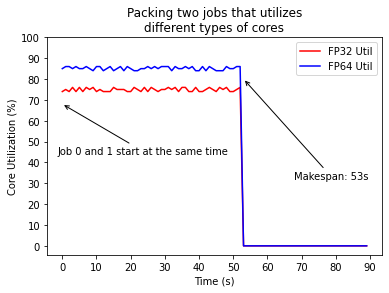

In [56]:
fp32_util = [fluctuate(75) for _ in range(53)] + [0] * 37
fp64_util = [fluctuate(85) for _ in range(53)] + [0] * 37


plt.plot(time, fp32_util, "-r", label="FP32 Util")
plt.plot(time, fp64_util, "-b", label="FP64 Util")
plt.legend(loc="upper right")
plt.yticks(np.arange(0, 110, 10.0))
plt.xticks(np.arange(0, 100, 10.0))
plt.title("Packing two jobs that utilizes\ndifferent types of cores")
plt.ylabel("Core Utilization (%)")
plt.xlabel("Time (s)")
plt.annotate("Makespan: 53s",
            xy=(53.0, 80), xycoords='data',
            xytext=(50, -100), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Job 0 and 1 start at the same time",
            xy=(0, 68), xycoords='data',
            xytext=(-5, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
plt.savefig(f"fig1_ss.png")
plt.show()
plt.close()

### Figure 1.3 (Right): Running two jobs that both under-utilize FP32 cores using different schemes

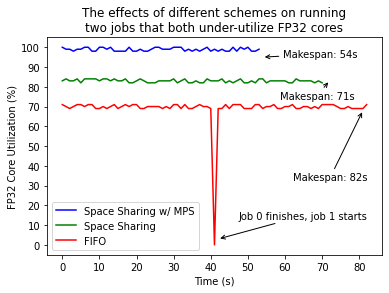

In [57]:
time = list(range(83))

fifo = [fluctuate(70) for _ in range(41)] + [0] + [fluctuate(70) for _ in range(41)]
ss = [fluctuate(83) for _ in range(71)] + [None] * 12
ss_mps = [fluctuate(99) for _ in range(54)] + [None] * 29

plt.plot(time, ss_mps, "-b", label="Space Sharing w/ MPS")
plt.plot(time, ss, "-g", label="Space Sharing")
plt.plot(time, fifo, "-r", label="FIFO")

plt.legend(loc="lower left")
plt.yticks(np.arange(0, 110, 10.0))
plt.xticks(np.arange(0, 90, 10.0))
plt.title("The effects of different schemes on running\ntwo jobs that both under-utilize FP32 cores")
plt.ylabel("FP32 Core Utilization (%)")
plt.xlabel("Time (s)")
# https://matplotlib.org/2.0.2/examples/pylab_examples/annotation_demo2.html
plt.annotate("Makespan: 54s",
            xy=(54, 95), xycoords='data',
            xytext=(20, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Makespan: 71s",
            xy=(72, 83), xycoords='data',
            xytext=(-50, -18), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Makespan: 82s",
            xy=(81, 68), xycoords='data',
            xytext=(-70, -70), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Job 0 finishes, job 1 starts",
            xy=(42, 3), xycoords='data',
            xytext=(20, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

plt.savefig(f"fig1_right.png")
plt.show()
plt.close()

## Figure 2: Slowdown factor comparison of different workloads

In [58]:
batch_sizes_dict = {
    "ResNet-18": [16, 32, 256],
    "ResNet-50": [16, 32, 64, 128],
#     "Transformer": [16, 32, 64, 128],
#     "LM": [5, 10, 20, 40, 80, 160],
    "Recommendation": [512, 1024, 2048, 4096, 8192],
#     "CycleGAN": [1, 2, 4]
}

jct_dict = {
    "ResNet-18": {
        16: [71.05, 58.74, 51.93, 48.37, 45.95, 45.13, 43.98, 42.36, 42.25],
        32: [53.68, 40.73, 34.29, 29.94, 27.69, 26.65, 25.52, 24.88, 24.49],
        256: [45.74, 32.91, 26.56, 22.25, 19.67, 18.48, 17.11, 15.7, 15.13]
    },
    "ResNet-50": {
        16: [1188.83, 867.28, 690.13, 594.27, 537.03, 478.82, 456.74, 427.02, 402.49],
        32: [1059.85, 751.18, 598.97, 510.32, 456.5, 413.98, 387.8, 360.17, 344.61],
        64: [1002.86, 708.96, 561.18, 474.39, 427.63, 386.59, 356.32, 333.53, 315.81],
        128: [980.55, 691.22, 543.73, 458.34, 410.31, 365.64, 339.29, 319.76, 300.85],
    },
    "Recommendation": {
        512: [79.69, 75.36, 70.78, 58.1, 52.95, 52.26, 71.9, 71.98, 67.19],
        1024: [65.72, 72.08, 71.83, 67.98, 56.59, 71.27, 67.06, 69.4, 57.16],
        2048: [79.22, 75.16, 71.46, 62.74, 66.07, 69.05, 52.96, 68.62, 68.88],
        4096: [70.95, 62.31, 54.3, 62.96, 64.56, 62.84, 50.31, 61.55, 65.09],
        8192: [59.2, 53.91, 50.15, 48.81, 48.68, 50.49, 46.63, 51.5, 48.02]
    },
}

util_dict = {
    "ResNet-18": {
        16: 76.8,
        32: 87.6,
        256: 98.8
    },
    "ResNet-50": {
        16: 96,
        32: 96.4,
        64: 98.8,
        128: 99.2,
    },
    "Recommendation": {
        512: 12.3,
        1024: 8.9,
        2048: 12.2,
        4096: 10.9,
        8192: 15.3
    },
}

y_ranges = {
    "Recommendation": np.arange(0.75, 1.5, 0.25),
    "ResNet-18": np.arange(1.0, 3.5, 0.5),
    "ResNet-50": np.arange(1.0, 4.0, 0.5)
}

plotting_colors = ["r", "g", "b", "c", "m", "y"]

compute_percentage = list(range(20, 110, 10))

def plot_slowdown_factor_of_job(job):
    for i, bs in enumerate(batch_sizes_dict[job["model"]]):
        jct = jct_dict[job["model"]][bs]
        # compute the slowdown factor w.r.t MPS percentage = 100%
        slowdowns = [x / jct[8] for x in jct]
        plt.plot(compute_percentage, slowdowns, f"-{plotting_colors[i]}^",
                 label=f"bs={bs}, NVML util={util_dict[job['model']][bs]}%")
    plt.legend(loc="upper right")
    plt.yticks(y_ranges[job["model"]])
    plt.title(f"Slowdown factor comparison of {job['model']} +\n{job['dataset']} using different batch sizes")
    plt.ylabel("Slowdown factor")
    plt.xlabel("MPS thread percentage (%)")
    plt.savefig(f"{job['model']}.png")
    plt.show()
    plt.close()

### Figure 2.1 (Left): Slowdown factor comparison of ResNet-18 + CIFAR-10 using different batch sizes

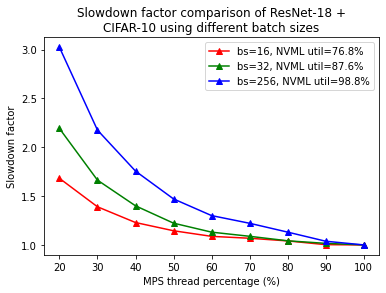

In [59]:
job = {
    "model": "ResNet-18", 
    "dataset": "CIFAR-10", 
}

plot_slowdown_factor_of_job(job)

### Figure 2.2 (Middle): Slowdown factor comparison of ResNet-50 + ImageNet using different batch sizes

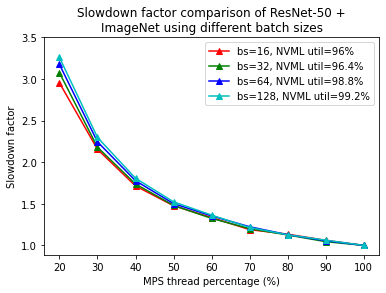

In [60]:
job = {
    "model": "ResNet-50", 
    "dataset": "ImageNet", 
}

plot_slowdown_factor_of_job(job)

### Figure 2.3 (Right): Slowdown factor comparison of Recoder + ML-20M using different batch sizes

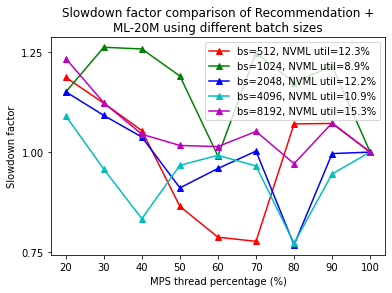

In [61]:
job = {
    "model": "Recommendation", 
    "dataset": "ML-20M", 
}

plot_slowdown_factor_of_job(job)